In [96]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
import scipy.stats as stats


In [179]:
data=pd.read_csv("data_house.csv")
df=data.copy()
df.head()

,price,ann_date,type,category,const_type,net_m2,brut_m2,room,age,floor,no_of_floor,heating,due,deposit,no_of_bathroom,no_of_wc,in_site,furniture,location
0,"1,900TL",26 Şubat 2021,Konut,Kiralık,Belirtilmemiş,50 m2,70 m2,1+1,5-10,13. Kat,16,Merkezi (Pay Ölçer),Belirtilmemiş,Belirtilmemiş,1,Belirtilmemiş,Hayır,Boş,Avcılar
1,"4,000TL",26 Şubat 2021,Konut,Kiralık,Betonarme,115 m2,125 m2,3+1,20 Ve Üzeri,4. Kat,5,Merkezi Doğalgaz,450 TL,4.000 TL,1,1,Hayır,Boş,Beşiktaş
2,"2,200TL",25 Şubat 2021,Konut,Kiralık,Betonarme,100 m2,120 m2,3+1,4,Düz Giriş,6,Kombi Doğalgaz,50 TL,4.400 TL,1,1,Hayır,Eşyalı,Beylikdüzü
3,"2,000TL",24 Şubat 2021,Konut,Kiralık,Belirtilmemiş,90 m2,100 m2,2+1,5-10,1. Kat,9,Merkezi (Pay Ölçer),280 TL,Belirtilmemiş,1,1,Hayır,Eşyalı,Esenyurt
4,"7,500TL",24 Şubat 2021,Konut,Kiralık,Betonarme,128 m2,140 m2,2+1,20 Ve Üzeri,2. Kat,6,Merkezi Doğalgaz,1.450 TL,Belirtilmemiş,2,Belirtilmemiş,Evet,Boş,Beşiktaş


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   price           1497 non-null   object
 1   ann_date        1497 non-null   object
 2   type            1497 non-null   object
 3   category        1497 non-null   object
 4   const_type      1497 non-null   object
 5   net_m2          1497 non-null   object
 6   brut_m2         1497 non-null   object
 7   room            1497 non-null   object
 8   age             1497 non-null   object
 9   floor           1497 non-null   object
 10  no_of_floor     1497 non-null   int64 
 11  heating         1497 non-null   object
 12  due             1497 non-null   object
 13  deposit         1497 non-null   object
 14  no_of_bathroom  1497 non-null   object
 15  no_of_wc        1497 non-null   object
 16  in_site         1497 non-null   object
 17  furniture       1497 non-null   object
 18  location

In [181]:
df.price=df.price.str.strip(" TL ").str.strip("TLarrow_downward").str.replace(",","")
df.price=df.price.astype(int)

In [182]:
df.head()

,price,ann_date,type,category,const_type,net_m2,brut_m2,room,age,floor,no_of_floor,heating,due,deposit,no_of_bathroom,no_of_wc,in_site,furniture,location
0,1900,26 Şubat 2021,Konut,Kiralık,Belirtilmemiş,50 m2,70 m2,1+1,5-10,13. Kat,16,Merkezi (Pay Ölçer),Belirtilmemiş,Belirtilmemiş,1,Belirtilmemiş,Hayır,Boş,Avcılar
1,4000,26 Şubat 2021,Konut,Kiralık,Betonarme,115 m2,125 m2,3+1,20 Ve Üzeri,4. Kat,5,Merkezi Doğalgaz,450 TL,4.000 TL,1,1,Hayır,Boş,Beşiktaş
2,2200,25 Şubat 2021,Konut,Kiralık,Betonarme,100 m2,120 m2,3+1,4,Düz Giriş,6,Kombi Doğalgaz,50 TL,4.400 TL,1,1,Hayır,Eşyalı,Beylikdüzü
3,2000,24 Şubat 2021,Konut,Kiralık,Belirtilmemiş,90 m2,100 m2,2+1,5-10,1. Kat,9,Merkezi (Pay Ölçer),280 TL,Belirtilmemiş,1,1,Hayır,Eşyalı,Esenyurt
4,7500,24 Şubat 2021,Konut,Kiralık,Betonarme,128 m2,140 m2,2+1,20 Ve Üzeri,2. Kat,6,Merkezi Doğalgaz,1.450 TL,Belirtilmemiş,2,Belirtilmemiş,Evet,Boş,Beşiktaş


In [183]:
df.net_m2=df.net_m2.str.strip("m2").str.replace(".","").astype(int)

In [184]:
df.brut_m2=df.brut_m2.str.strip("m2").str.replace(".","").astype(int)

In [185]:
df.deposit=df.deposit.str.strip(" TL ").str.replace(".","")
df.loc[df.deposit=="Belirtilmemiş","deposit"]=0
df.loc[df.deposit==1,"deposit"]=0
df.deposit=df.deposit.astype(int)

In [186]:
df.head()

,price,ann_date,type,category,const_type,net_m2,brut_m2,room,age,floor,no_of_floor,heating,due,deposit,no_of_bathroom,no_of_wc,in_site,furniture,location
0,1900,26 Şubat 2021,Konut,Kiralık,Belirtilmemiş,50,70,1+1,5-10,13. Kat,16,Merkezi (Pay Ölçer),Belirtilmemiş,0,1,Belirtilmemiş,Hayır,Boş,Avcılar
1,4000,26 Şubat 2021,Konut,Kiralık,Betonarme,115,125,3+1,20 Ve Üzeri,4. Kat,5,Merkezi Doğalgaz,450 TL,4000,1,1,Hayır,Boş,Beşiktaş
2,2200,25 Şubat 2021,Konut,Kiralık,Betonarme,100,120,3+1,4,Düz Giriş,6,Kombi Doğalgaz,50 TL,4400,1,1,Hayır,Eşyalı,Beylikdüzü
3,2000,24 Şubat 2021,Konut,Kiralık,Belirtilmemiş,90,100,2+1,5-10,1. Kat,9,Merkezi (Pay Ölçer),280 TL,0,1,1,Hayır,Eşyalı,Esenyurt
4,7500,24 Şubat 2021,Konut,Kiralık,Betonarme,128,140,2+1,20 Ve Üzeri,2. Kat,6,Merkezi Doğalgaz,1.450 TL,0,2,Belirtilmemiş,Evet,Boş,Beşiktaş


In [187]:
df.due=df.due.str.strip(" TL ").str.replace(".","")
df.loc[df.due=="Belirtilmemiş","due"]=0
df.due=df.due.astype(int)

In [188]:
df.head()

,price,ann_date,type,category,const_type,net_m2,brut_m2,room,age,floor,no_of_floor,heating,due,deposit,no_of_bathroom,no_of_wc,in_site,furniture,location
0,1900,26 Şubat 2021,Konut,Kiralık,Belirtilmemiş,50,70,1+1,5-10,13. Kat,16,Merkezi (Pay Ölçer),0,0,1,Belirtilmemiş,Hayır,Boş,Avcılar
1,4000,26 Şubat 2021,Konut,Kiralık,Betonarme,115,125,3+1,20 Ve Üzeri,4. Kat,5,Merkezi Doğalgaz,450,4000,1,1,Hayır,Boş,Beşiktaş
2,2200,25 Şubat 2021,Konut,Kiralık,Betonarme,100,120,3+1,4,Düz Giriş,6,Kombi Doğalgaz,50,4400,1,1,Hayır,Eşyalı,Beylikdüzü
3,2000,24 Şubat 2021,Konut,Kiralık,Belirtilmemiş,90,100,2+1,5-10,1. Kat,9,Merkezi (Pay Ölçer),280,0,1,1,Hayır,Eşyalı,Esenyurt
4,7500,24 Şubat 2021,Konut,Kiralık,Betonarme,128,140,2+1,20 Ve Üzeri,2. Kat,6,Merkezi Doğalgaz,1450,0,2,Belirtilmemiş,Evet,Boş,Beşiktaş


In [189]:

df.loc[df.furniture=="Belirtilmemiş","furniture"]="Boş"

In [190]:
df.loc[df.no_of_bathroom=="Yok","no_of_bathroom"]=0
df.loc[df.no_of_bathroom=="6+","no_of_bathroom"]=6

In [191]:
df.head()

,price,ann_date,type,category,const_type,net_m2,brut_m2,room,age,floor,no_of_floor,heating,due,deposit,no_of_bathroom,no_of_wc,in_site,furniture,location
0,1900,26 Şubat 2021,Konut,Kiralık,Belirtilmemiş,50,70,1+1,5-10,13. Kat,16,Merkezi (Pay Ölçer),0,0,1,Belirtilmemiş,Hayır,Boş,Avcılar
1,4000,26 Şubat 2021,Konut,Kiralık,Betonarme,115,125,3+1,20 Ve Üzeri,4. Kat,5,Merkezi Doğalgaz,450,4000,1,1,Hayır,Boş,Beşiktaş
2,2200,25 Şubat 2021,Konut,Kiralık,Betonarme,100,120,3+1,4,Düz Giriş,6,Kombi Doğalgaz,50,4400,1,1,Hayır,Eşyalı,Beylikdüzü
3,2000,24 Şubat 2021,Konut,Kiralık,Belirtilmemiş,90,100,2+1,5-10,1. Kat,9,Merkezi (Pay Ölçer),280,0,1,1,Hayır,Eşyalı,Esenyurt
4,7500,24 Şubat 2021,Konut,Kiralık,Betonarme,128,140,2+1,20 Ve Üzeri,2. Kat,6,Merkezi Doğalgaz,1450,0,2,Belirtilmemiş,Evet,Boş,Beşiktaş


In [192]:
df.loc[df.no_of_wc=="Belirtilmemiş","no_of_wc"]=1
df.loc[df.no_of_wc=="Yok","no_of_wc"]=1
df.loc[df.no_of_wc=="6+","no_of_wc"]=6
df.no_of_wc=df.no_of_wc.astype(int)

In [193]:
df.head()

,price,ann_date,type,category,const_type,net_m2,brut_m2,room,age,floor,no_of_floor,heating,due,deposit,no_of_bathroom,no_of_wc,in_site,furniture,location
0,1900,26 Şubat 2021,Konut,Kiralık,Belirtilmemiş,50,70,1+1,5-10,13. Kat,16,Merkezi (Pay Ölçer),0,0,1,1,Hayır,Boş,Avcılar
1,4000,26 Şubat 2021,Konut,Kiralık,Betonarme,115,125,3+1,20 Ve Üzeri,4. Kat,5,Merkezi Doğalgaz,450,4000,1,1,Hayır,Boş,Beşiktaş
2,2200,25 Şubat 2021,Konut,Kiralık,Betonarme,100,120,3+1,4,Düz Giriş,6,Kombi Doğalgaz,50,4400,1,1,Hayır,Eşyalı,Beylikdüzü
3,2000,24 Şubat 2021,Konut,Kiralık,Belirtilmemiş,90,100,2+1,5-10,1. Kat,9,Merkezi (Pay Ölçer),280,0,1,1,Hayır,Eşyalı,Esenyurt
4,7500,24 Şubat 2021,Konut,Kiralık,Betonarme,128,140,2+1,20 Ve Üzeri,2. Kat,6,Merkezi Doğalgaz,1450,0,2,1,Evet,Boş,Beşiktaş


In [194]:
df=df.drop(["ann_date","type","category"],axis=1)

In [195]:
cat_cols=df.select_dtypes(include="O").columns.to_list()

for col in cat_cols:
    print(display(df[col].value_counts().to_frame().T))

,Betonarme,Belirtilmemiş,Çelik,Taş Bina,Kagir,Ahşap
const_type,774,692,24,4,2,1


None


,2+1,3+1,1+1,Stüdyo,4+1,1 Oda,5+1,5+2,4+2,3+2,7+1,8+ Oda,2+2,6+2,6+1
room,644,353,324,78,39,11,11,7,7,6,6,4,4,2,1


None


,20 Ve Üzeri,5-10,11-20,4,0 (Yeni),3,1,2
age,445,336,276,148,135,64,51,42


None


,1. Kat,2. Kat,3. Kat,4. Kat,Yüksek Giriş,Düz Giriş,5. Kat,Bahçe Katı,6. Kat,10. Kat,7. Kat,8. Kat,12. Kat,9. Kat,13. Kat,Çatı Katı,11. Kat,Kot 1,14. Kat,16. Kat,Yarı Bodrum,Villa Tipi,Çatı Dubleks,15. Kat,18. Kat,20. Kat,Müstakil,Kot 2,17. Kat,Kot 3,19. Kat,22. Kat,Bahçe Dublex,24. Kat,23. Kat,30-40. Kat,21. Kat,25. Kat,31. Kat,30. Kat,27. Kat,Tam Bodrum,28. Kat
floor,198,194,178,141,115,105,83,66,54,39,38,34,31,27,22,20,18,17,11,11,10,9,9,8,7,6,6,5,5,5,4,4,3,2,2,2,2,1,1,1,1,1,1


None


,Kombi Doğalgaz,Merkezi (Pay Ölçer),Merkezi Doğalgaz,Doğalgaz Sobalı,Isıtma Yok,Sobalı,Yerden Isıtma,Klimalı,Kat Kaloriferi,Kombi Fueloil
heating,950,373,117,18,10,9,8,8,3,1


None


,1,2,3,4,0,5,6
no_of_bathroom,1176,277,23,10,7,2,2


None


,Hayır,Evet
in_site,1412,85


None


,Boş,Eşyalı
furniture,1215,282


None


,Sarıyer,Pendik,Bahçelievler,Kartal,Şişli,Esenyurt,Kağıthane,Fatih,Ümraniye,Beşiktaş,Üsküdar,Maltepe,Eyüpsultan,Kadıköy,Ataşehir,Küçükçekmece,Başakşehir,Sarıyer Kiralık Residenc,Avcılar,Bakırköy,Sancaktepe,Beylikdüzü,Beyoğlu,Gaziosmanpaşa,Çekmeköy,Kağıthane Kiralık Residenc,Bağcılar,Sultanbeyli,Gaziosmanpaşa Kiralık Residenc,Bayrampaşa,Tuzla,Şişli Kiralık Residenc,Zeytinburnu,Esenyurt Kiralık Residenc,Sarıyer Kiralık V,Arnavutköy,Güngören,Sultangazi,Silivri,Esenler,Beşiktaş Kiralık Residenc,Büyükçekmece,Beykoz Kiralık V,Kadıköy Kiralık Residenc,Çatalca,Zeytinburnu Kiralık Residenc,Ataşehir Kiralık Residenc,Pendik Kiralık V,Sultanbeyli Kiralık Residenc,Fatih Kiralık Müstakil Ev,Beyoğlu Kiralık Müstakil Ev,Kartal Kiralık Residenc,Beylikdüzü Kiralık Bin,Beşiktaş Kiralık Köş,Bakırköy Kiralık V,Sarıyer Kiralık Müstakil Ev,Bahçelievler Kiralık Residenc,Şile,Bağcılar Kiralık Residenc,Beykoz,Üsküdar Kiralık Residenc,Pendik Kiralık Residenc,Çekmeköy Kiralık V,Sancaktepe Kiralık Müstakil Ev,Sultanbeyli Kiralık Müstakil Ev,Maltepe Kiralık V,Maltepe Kiralık Residenc,Beylikdüzü Kiralık V,Bakırköy Kiralık Residenc,Bayrampaşa Kiralık Residenc,Beylikdüzü Kiralık Residenc,Başakşehir Kiralık V,Fatih Kiralık Bin,Başakşehir Kiralık Residenc,Üsküdar Kiralık Müstakil Ev,Üsküdar Kiralık Yalı (Komple),Beykoz Kiralık Köş
location,128,123,92,78,74,65,63,56,55,51,51,42,41,40,38,38,37,35,34,31,31,31,26,24,21,19,17,13,12,11,10,9,7,6,6,6,6,6,6,4,4,4,3,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


None


In [196]:
df.loc[np.isin(df.age,["1","2","3","4"]),"age"]="1-4"

In [197]:
df.loc[np.isin(df.heating,["Doğalgaz Sobalı","Sobalı","Yerden Isıtma","Klimalı","Kat Kaloriferi","Kombi Fueloil"]),"heating"]="Other"

In [198]:
df.loc[df.const_type=="Belirtilmemiş","const_type"]="Betonarme"

In [199]:
df.loc[np.isin(df.const_type,["Çelik","Taş Bina","Ahşap","Kagir"]),"const_type"]="Other"

In [200]:
df.loc[np.isin(df.room,["5+1","4+2","2+2","8+ Oda","5+2","3+2","6+2","7+1","7+2","6+1"]),"room"]="Other"
df.loc[df.room=="1 Oda","room"]="1+1"

In [201]:
#df.drop(["floor"],axis=1,inplace=True)
df.floor.value_counts().to_frame().T

,1. Kat,2. Kat,3. Kat,4. Kat,Yüksek Giriş,Düz Giriş,5. Kat,Bahçe Katı,6. Kat,10. Kat,7. Kat,8. Kat,12. Kat,9. Kat,13. Kat,Çatı Katı,11. Kat,Kot 1,14. Kat,16. Kat,Yarı Bodrum,Villa Tipi,Çatı Dubleks,15. Kat,18. Kat,20. Kat,Müstakil,Kot 2,17. Kat,Kot 3,19. Kat,22. Kat,Bahçe Dublex,24. Kat,23. Kat,30-40. Kat,21. Kat,25. Kat,31. Kat,30. Kat,27. Kat,Tam Bodrum,28. Kat
floor,198,194,178,141,115,105,83,66,54,39,38,34,31,27,22,20,18,17,11,11,10,9,9,8,7,6,6,5,5,5,4,4,3,2,2,2,2,1,1,1,1,1,1


In [202]:
df.floor=df.floor.str.strip(".Kat").str.rstrip(" .")
df.loc[df.floor=="ot 1","floor"]= (-1)
df.loc[df.floor=="ot 2","floor"]= (-2)
df.loc[df.floor=="ot 3","floor"]= (-3)
df.loc[df.floor=="Yüksek Giriş","floor"]= 0
df.loc[df.floor=="Düz Giriş","floor"]= 0
df.loc[df.floor=="Tam Bodrum","floor"]= 0
df.loc[df.floor=="Müstakil","floor"]= 1
df.loc[df.floor=="Yarı Bodrum","floor"]= 0
df.loc[df.floor=="Bahçe Katı","floor"]= 1
df.loc[df.floor=="Bahçe Dublex","floor"]= 2
df.loc[df.floor=="30-40","floor"]= 30
df.loc[df.floor=="Çatı Dubleks","floor"]= 2
df.loc[df.floor=="Villa Tipi","floor"]= 2
df.loc[df.floor=="Çatı Katı","floor"]= 2


In [203]:
df["floor"]=df["floor"].astype(int)

In [204]:
df.no_of_bathroom=df.no_of_bathroom.astype(int)

In [205]:
df.dtypes

price              int32
const_type        object
net_m2             int32
brut_m2            int32
room              object
age               object
floor              int32
no_of_floor        int64
heating           object
due                int32
deposit            int32
no_of_bathroom     int32
no_of_wc           int32
in_site           object
furniture         object
location          object
dtype: object

In [206]:
df.loc[df.location=="Esenyurt Kiralık Residenc","location"]="Esenyurt"
df.loc[df.location=="Kağıthane Kiralık Residenc","location"]="Kağıthane"
df.loc[df.location=="Şişli Kiralık Residenc","location"]="Şişli"
df.loc[df.location=="Zeytinburnu Kiralık Residenc","location"]="Zeytinburnu"
df.loc[df.location=="Gaziosmanpaşa Kiralık Residenc","location"]="Gaziosmanpaşa"
df.loc[df.location=="Fatih Kiralık Müstakil Ev","location"]="Fatih"
df.loc[df.location=="Sarıyer Kiralık Residenc","location"]="Sarıyer"
df.loc[df.location=="Kartal Kiralık Residenc","location"]="Kartal"
df.loc[df.location=="Kadıköy Kiralık Residenc","location"]="Kadıköy"
df.loc[df.location=="Beyoğlu Kiralık Müstakil Ev","location"]="Beyoğlu"
df.loc[df.location=="Üsküdar Kiralık Müstakil Ev","location"]="Üsküdar"
df.loc[df.location=="Sarıyer Kiralık V","location"]="Sarıyer"
df.loc[df.location=="Beşiktaş Kiralık Köş","location"]="Beşiktaş"
df.loc[df.location=="Bahçelievler Kiralık Residenc","location"]="Bahçelievler"
df.loc[df.location=="Beşiktaş Kiralık Residenc","location"]="Beşiktaş"
df.loc[df.location=="Beykoz Kiralık V","location"]="Beykoz"
df.loc[df.location=="Pendik Kiralık V","location"]="Pendik"
df.loc[df.location=="Sultanbeyli Kiralık Residenc","location"]="Sultanbeyli"
df.loc[df.location=="Ataşehir Kiralık Residenc","location"]="Ataşehir"
df.loc[df.location=="Başakşehir Kiralık V","location"]="Başakşehir"
df.loc[df.location=="Sultanbeyli Kiralık Müstakil Ev","location"]="Sultanbeyli"
df.loc[df.location=="Bağcılar Kiralık Residenc","location"]="Bağcılar"
df.loc[df.location=="Pendik Kiralık Residenc","location"]="Pendik"
df.loc[df.location=="Başakşehir Kiralık Residenc","location"]="Başakşehir"
df.loc[df.location=="Beylikdüzü Kiralık Bin","location"]="Beylikdüzü"
df.loc[df.location=="Bayrampaşa Kiralık Residenc","location"]="Bayrampaşa"
df.loc[df.location=="Üsküdar Kiralık Yalı (Komple)","location"]="Üsküdar"
df.loc[df.location=="Beykoz Kiralık Köş","location"]="Beykoz"
df.loc[df.location=="Sancaktepe Kiralık Müstakil Ev","location"]="Sancaktepe"
df.loc[df.location=="Bakırköy Kiralık V","location"]="Bakırköy"
df.loc[df.location=="Fatih Kiralık Bin","location"]="Fatih"
df.loc[df.location=="Çekmeköy Kiralık V","location"]="Çekmeköy"
df.loc[df.location=="Maltepe Kiralık Residenc","location"]="Maltepe"
df.loc[df.location=="Üsküdar Kiralık Residenc","location"]="Üsküdar"
df.loc[df.location=="Sarıyer Kiralık Müstakil Ev","location"]="Sarıyer"
df.loc[df.location=="Maltepe Kiralık V","location"]="Maltepe"
df.loc[df.location=="Beylikdüzü Kiralık V","location"]="Beylikdüzü"
df.loc[df.location=="Bakırköy Kiralık Residenc","location"]="Bakırköy"
df.loc[df.location=="Beylikdüzü Kiralık Residenc","location"]="Beylikdüzü"


In [207]:
df.location.value_counts().to_frame().T

,Sarıyer,Pendik,Bahçelievler,Şişli,Kağıthane,Kartal,Esenyurt,Fatih,Beşiktaş,Ümraniye,Üsküdar,Maltepe,Kadıköy,Eyüpsultan,Ataşehir,Başakşehir,Küçükçekmece,Gaziosmanpaşa,Avcılar,Beylikdüzü,Bakırköy,Sancaktepe,Beyoğlu,Çekmeköy,Bağcılar,Sultanbeyli,Bayrampaşa,Tuzla,Zeytinburnu,Güngören,Arnavutköy,Sultangazi,Silivri,Beykoz,Esenler,Büyükçekmece,Çatalca,Şile
location,170,126,93,83,82,80,71,59,56,55,54,44,42,41,40,39,38,36,34,34,33,32,28,22,18,16,12,10,9,6,6,6,6,5,4,4,2,1


In [208]:
df=df.drop(index=df[np.isin(df.location,["Çatalca","Şile","Esenler","Büyükçekmece","Güngören","Arnavutköy","Sultangazi","Silivri","Beykoz"])].index)

In [209]:
df.shape

(1457, 16)

In [210]:
df.head()

,price,const_type,net_m2,brut_m2,room,age,floor,no_of_floor,heating,due,deposit,no_of_bathroom,no_of_wc,in_site,furniture,location
0,1900,Betonarme,50,70,1+1,5-10,13,16,Merkezi (Pay Ölçer),0,0,1,1,Hayır,Boş,Avcılar
1,4000,Betonarme,115,125,3+1,20 Ve Üzeri,4,5,Merkezi Doğalgaz,450,4000,1,1,Hayır,Boş,Beşiktaş
2,2200,Betonarme,100,120,3+1,1-4,0,6,Kombi Doğalgaz,50,4400,1,1,Hayır,Eşyalı,Beylikdüzü
3,2000,Betonarme,90,100,2+1,5-10,1,9,Merkezi (Pay Ölçer),280,0,1,1,Hayır,Eşyalı,Esenyurt
4,7500,Betonarme,128,140,2+1,20 Ve Üzeri,2,6,Merkezi Doğalgaz,1450,0,2,1,Evet,Boş,Beşiktaş


In [211]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1457.0,19863.053535,564217.303809,450.0,1500.0,2100.0,3200.0,21500000.0
net_m2,1457.0,90.796843,64.377406,0.0,65.0,80.0,105.0,1200.0
brut_m2,1457.0,105.183940,75.204861,0.0,75.0,90.0,120.0,1300.0
floor,1457.0,3.936170,4.670684,-3.0,1.0,2.0,5.0,31.0
no_of_floor,1457.0,8.687714,8.078891,1.0,4.0,5.0,10.0,42.0
due,1457.0,79.347975,236.172072,0.0,0.0,0.0,20.0,2500.0
deposit,1457.0,1439.879204,7058.300588,0.0,0.0,0.0,1500.0,230000.0
no_of_bathroom,1457.0,1.238161,0.530886,0.0,1.0,1.0,1.0,6.0
no_of_wc,1457.0,1.130405,0.386253,1.0,1.0,1.0,1.0,6.0


In [212]:
df.describe(include="O").T

,count,unique,top,freq
const_type,1457,2,Betonarme,1428
room,1457,6,2+1,621
age,1457,5,20 Ve Üzeri,430
heating,1457,5,Kombi Doğalgaz,918
in_site,1457,2,Hayır,1372
furniture,1457,2,Boş,1182
location,1457,29,Sarıyer,170


In [213]:
def diagnostic_plots(df, variable):

    plt.figure(figsize=(16, 4))
   
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

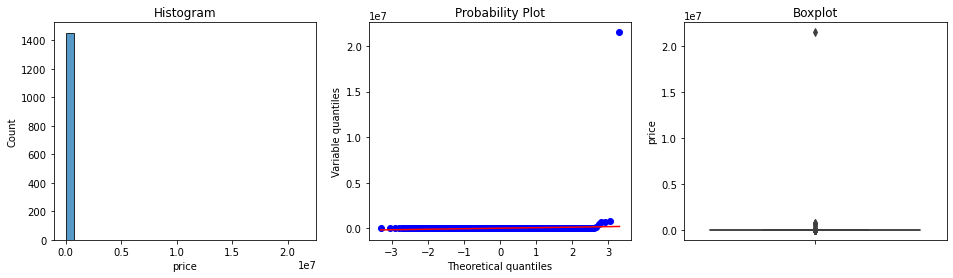

None

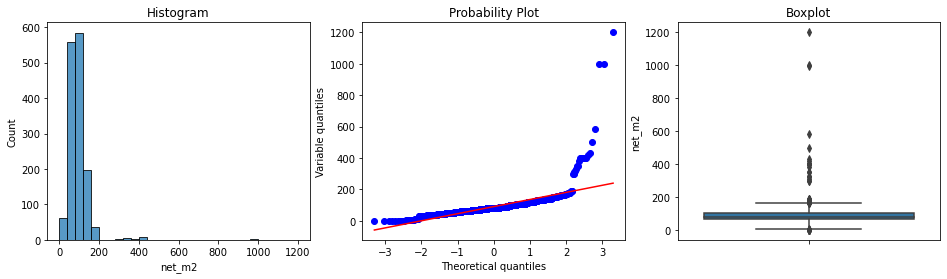

None

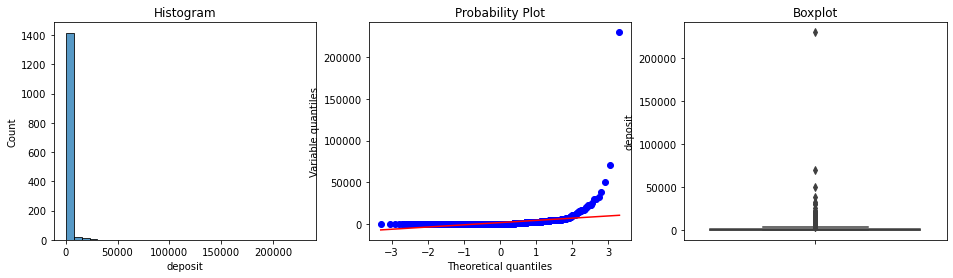

None

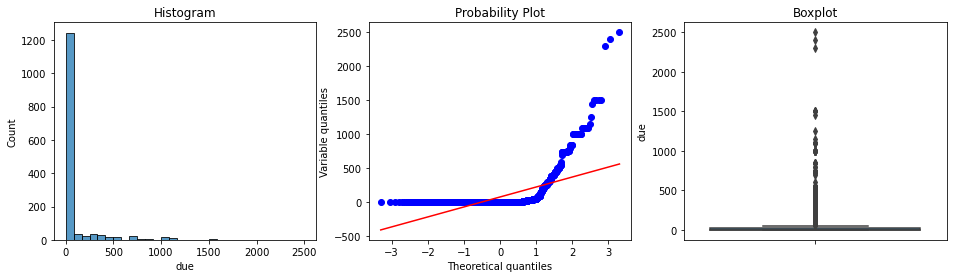

None

In [214]:
display(diagnostic_plots(df,"price"))
display(diagnostic_plots(df,"net_m2"))
display(diagnostic_plots(df,"deposit"))
display(diagnostic_plots(df,"due"))

In [215]:
def find_skewed_boundaries(df, variable, distance):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [216]:
upper,lower=find_skewed_boundaries(df,"price",1.5)
df=df.drop(df.loc[df.price>upper].index)

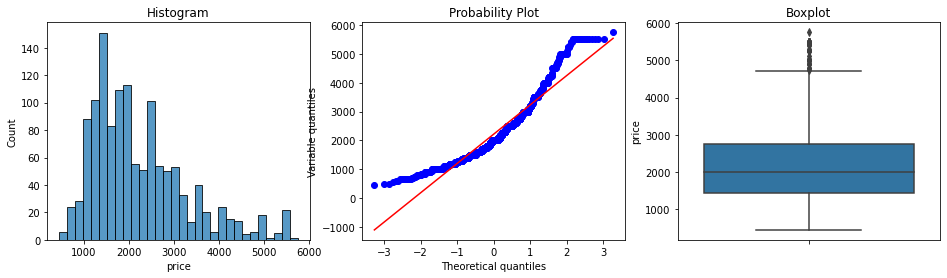

None

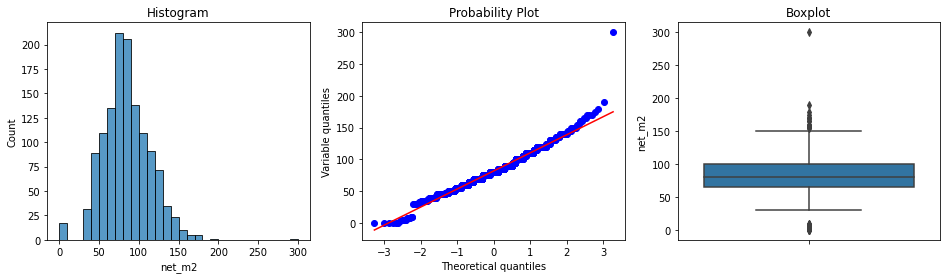

None

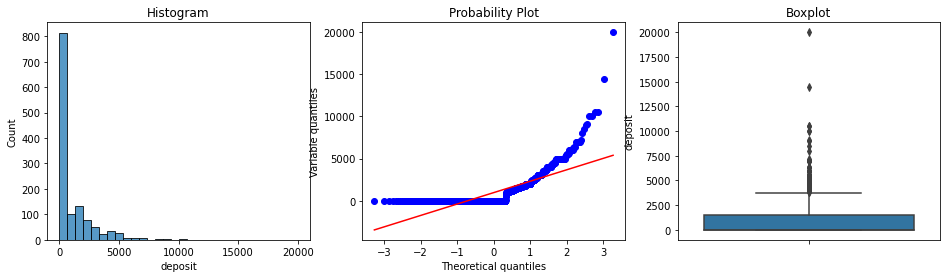

None

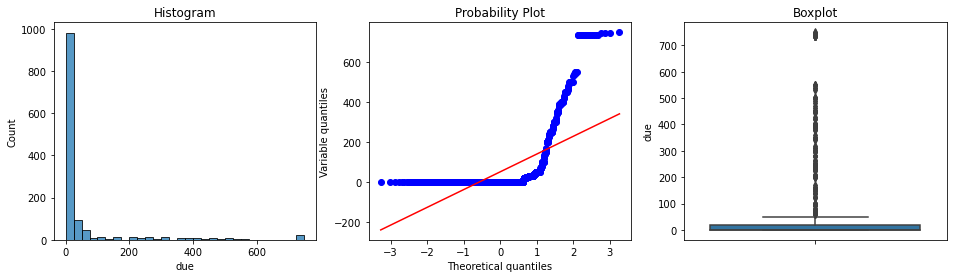

None

In [217]:
display(diagnostic_plots(df,"price"))
display(diagnostic_plots(df,"net_m2"))
display(diagnostic_plots(df,"deposit"))
display(diagnostic_plots(df,"due"))

In [218]:
df.shape

(1290, 16)

In [219]:
df.head()

,price,const_type,net_m2,brut_m2,room,age,floor,no_of_floor,heating,due,deposit,no_of_bathroom,no_of_wc,in_site,furniture,location
0,1900,Betonarme,50,70,1+1,5-10,13,16,Merkezi (Pay Ölçer),0,0,1,1,Hayır,Boş,Avcılar
1,4000,Betonarme,115,125,3+1,20 Ve Üzeri,4,5,Merkezi Doğalgaz,450,4000,1,1,Hayır,Boş,Beşiktaş
2,2200,Betonarme,100,120,3+1,1-4,0,6,Kombi Doğalgaz,50,4400,1,1,Hayır,Eşyalı,Beylikdüzü
3,2000,Betonarme,90,100,2+1,5-10,1,9,Merkezi (Pay Ölçer),280,0,1,1,Hayır,Eşyalı,Esenyurt
5,1500,Betonarme,85,98,2+1,5-10,3,5,Kombi Doğalgaz,40,1500,1,1,Hayır,Boş,Pendik


In [220]:
cat_cols=df.select_dtypes(include="O").columns.to_list()

for col in cat_cols:
    print(display(df[col].value_counts().to_frame().T))

,Betonarme,Other
const_type,1273,17


None


,2+1,1+1,3+1,Stüdyo,4+1,Other
room,581,314,281,78,20,16


None


,20 Ve Üzeri,5-10,1-4,11-20,0 (Yeni)
age,412,275,245,242,116


None


,Kombi Doğalgaz,Merkezi (Pay Ölçer),Merkezi Doğalgaz,Other,Isıtma Yok
heating,871,282,90,38,9


None


,Hayır,Evet
in_site,1215,75


None


,Boş,Eşyalı
furniture,1055,235


None


,Pendik,Bahçelievler,Sarıyer,Şişli,Kartal,Kağıthane,Esenyurt,Ümraniye,Fatih,Üsküdar,Beşiktaş,Maltepe,Ataşehir,Küçükçekmece,Eyüpsultan,Kadıköy,Avcılar,Başakşehir,Sancaktepe,Beylikdüzü,Beyoğlu,Gaziosmanpaşa,Bakırköy,Çekmeköy,Bağcılar,Sultanbeyli,Tuzla,Bayrampaşa,Zeytinburnu
location,124,93,89,78,78,78,71,55,54,51,41,41,39,38,36,35,34,33,31,31,27,26,25,20,17,16,10,10,9


None


In [221]:
df.to_csv("data_cleaned.csv",index=False)